### Demonstrating that logistic regression can be trained via Pr(success) instead of datasets of success / failure



In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression

In [30]:
iris = datasets.load_iris()
X = iris.data[:,0]  # only taking the first feature
Y = iris.target
Y[Y == 2] = 1 # reduce iris to binary classification

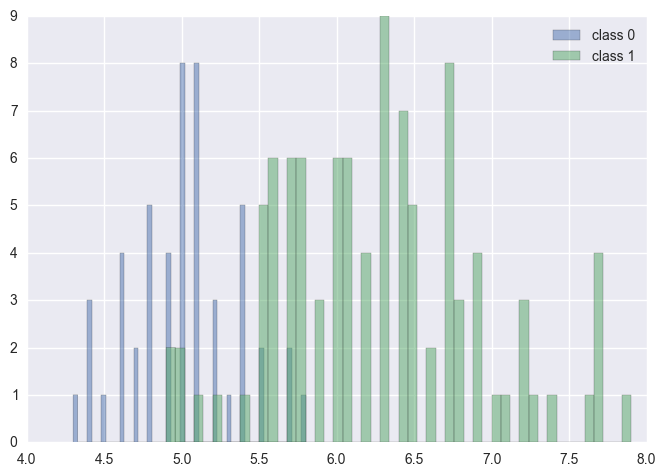

In [38]:
histbins = 50
plt.hist(X[Y == 0], histbins, alpha=0.5, label='class 0')
plt.hist(X[Y == 1], histbins, alpha=0.5, label='class 1')
plt.legend(loc='best')

#### Discretizing the data

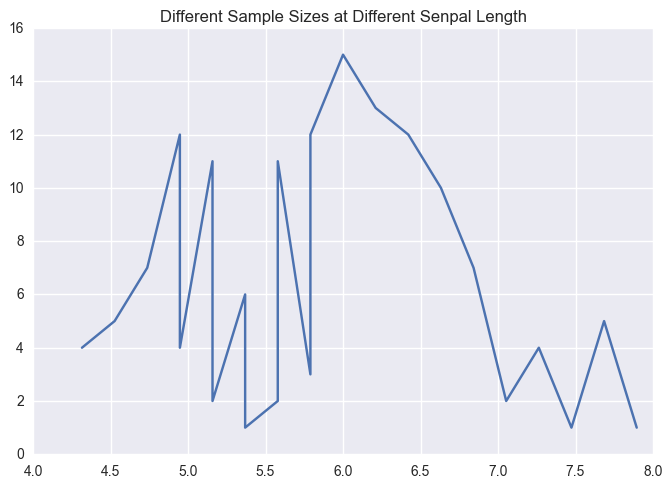

In [87]:
bins = np.linspace(4.0, 8.0, num=20)

X_binned = []
w_binned = []
y_binned = []

for lower, upper in zip(bins[:-1], bins[1:]):
    ys = Y[np.logical_and(X >= lower, X < upper)]
    if len(ys) == 0:
        continue
    curr_X = (lower + upper) / 2.0
    curr_y_0 = np.sum(ys == 0)
    curr_y_1 = np.sum(ys == 1)
    
    if curr_y_0 > 0:
        X_binned += [curr_X]
        y_binned += [0.0]
        w_binned += [curr_y_0]
    if curr_y_1 > 0:
        X_binned += [curr_X]
        y_binned += [1.0]
        w_binned += [curr_y_1]

X_binned = np.array(X_binned)
w_binned = np.array(w_binned)
y_binned = np.array(y_binned)

plt.plot(X_binned, w_binned)
plt.title("Different Sample Sizes at Different Senpal Length")

### Fitting Logistic Regression

In [80]:
normal = LogisticRegression()
normal.fit(X[:,np.newaxis], Y)

weighed = LogisticRegression()
weighed.fit(X_binned[:,np.newaxis], y_binned, w_binned)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
print normal.coef_, weighed.coef_
print normal.intercept_, weighed.intercept_

[[ 0.86959145]] [[ 0.87008925]]
[-4.16186636] [-4.15791571]


### This demonstrates how we can compact the logistic regression training size.
### This is especially powerful when most of X are categorical variables. 
#### A 5M sample can potentially be reduced to a few bytes